- 진공 처리에는 비용이 많이 듬.
- 따라서 이 비용을 줄이기 위해 VM이 버전 8.4에 도입.

- VM의 기본 개념
  - 각 테이블에는 테이블 파일의 각 페이지에 대한 가시성을 보유하는 개별 가시성 맵이 있음.
  - 페이지의 가시성에 따라 각 페이지에 데드 튜플이 있는지 여부가 결정됨.
  - 진공 처리는 해당 VM(가시성 맵)을 사용하여 데드 튜플이 없는 페이지를 건너뛸 수 있음.


**How the VM is used.**

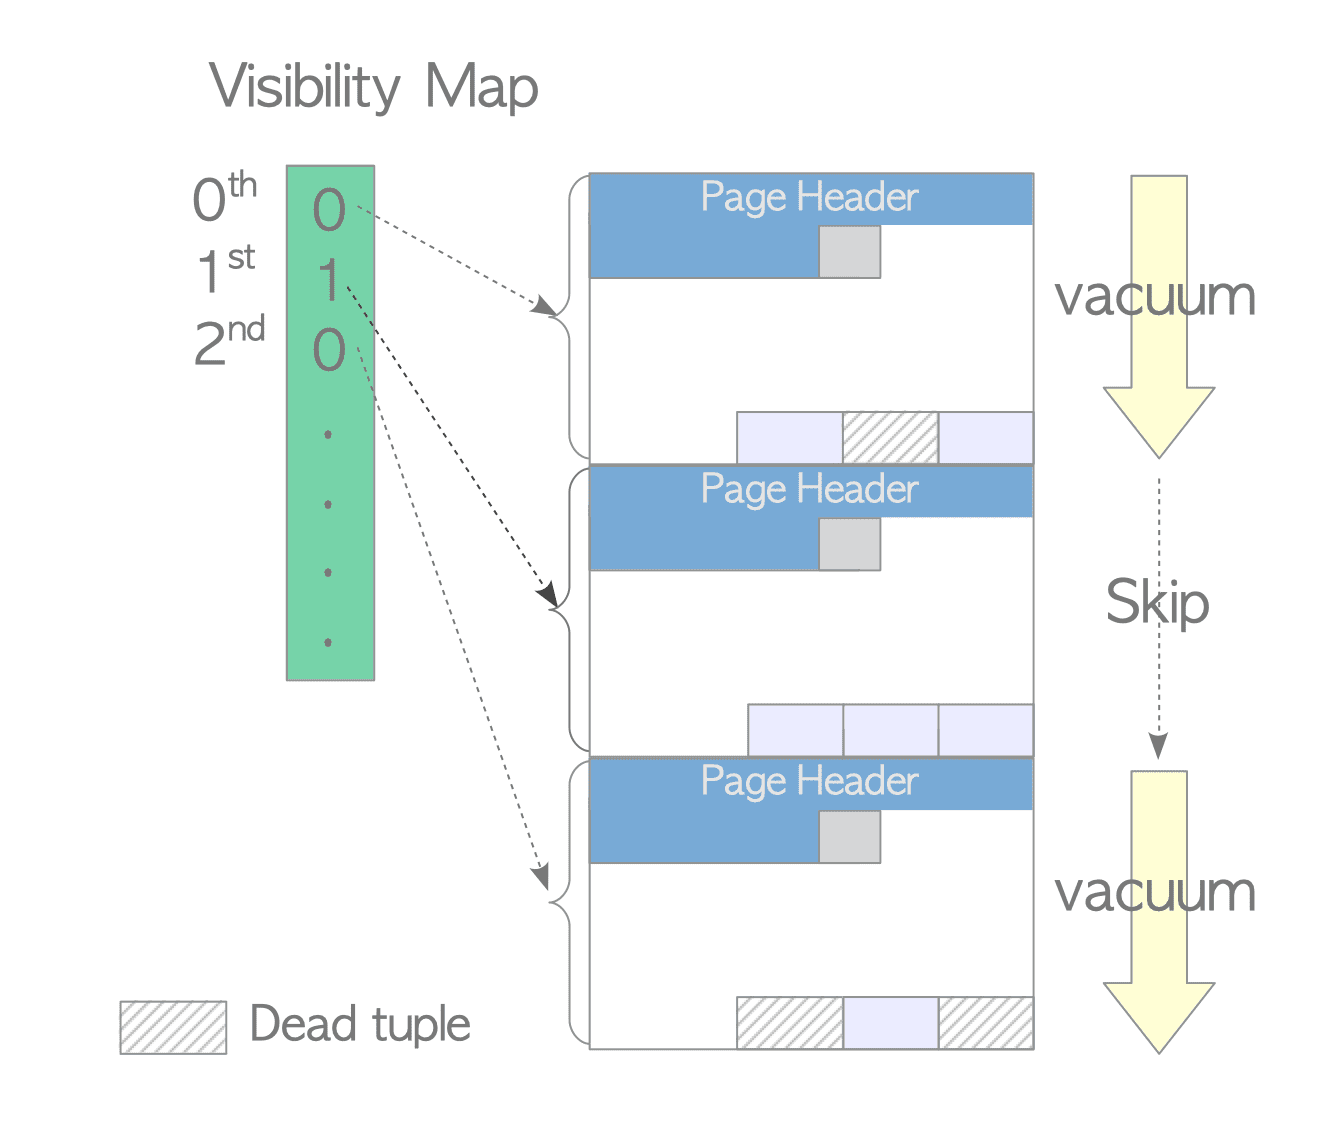

- 테이블이 세 페이지로 구성되어 있고 0번째와 2번째 페이지에는 데드 튜플이 있고 첫 번째 페이지에는 없다고 가정
  - 이 테이블의 VM에는 데드 튜플이 포함된 페이지에 대한 정보가 포함되어 있음.
  - 이 경우 Vacuum 처리는 VM의 정보를 참조하여 첫 번째 페이지를 건너뜀.

- 각 VM은 하나 이상의 8KB 페이지로 구성되며 이 파일은 'vm' 접미사로 저장됨.
- 예를 들어, 다음은 relfilenode가 18751이고 FSM(18751_fsm) 및 VM(18751_vm) 파일이 있는 하나의 테이블 파일.



```
$ cd $PGDATA
$ ls -la base/16384/18751*
-rw------- 1 postgres postgres  8192 Apr 21 10:21 base/16384/18751
-rw------- 1 postgres postgres 24576 Apr 21 10:18 base/16384/18751_fsm
-rw------- 1 postgres postgres  8192 Apr 21 10:18 base/16384/18751_vm
```

**Enhancement of VM**

- 버전 9.6에서는 VM이 ​​향상되어 고정 처리 효율성이 향상 됨.
- 새 VM은 페이지 가시성과 각 페이지에서 튜플이 고정되었는지 여부에 대한 정보를 표시